In [65]:
import pandas as pd
import matplotlib.pyplot as plt  # Asegúrate de importar matplotlib
import seaborn as sns  # Para usar heatmap

import numpy as np
import tensorflow as tf
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Input, Embedding, LSTM, Dense, Concatenate, Flatten, Reshape



In [66]:
# Cargo el dataset
file_path = r'C:\Users\rbacutac\OneDrive - Falabella\Documentos\cursos\topicosdecienciadedatos\dataset_proyecto2\dataset_proyecto2\dataset_elpino.csv'  # Reemplaza con la ruta a tu archivo CSV
data = pd.read_csv(file_path, delimiter=';')



In [67]:
# Creo una lista con los nombres de las columnas de diagnóstico
diagnosticos_cols = [f'Diag {i:02d} Principal (cod+des)' if i == 1 else f'Diag {i:02d} Secundario (cod+des)' for i in range(1, 36)]  # Hasta Diag 05, ajustar si hay más
# Crear una lista con los nombres de las columnas de procedimiento
procedimientos_cols = [f'Proced {i:02d} Principal (cod+des)' if i == 1 else f'Proced {i:02d} Secundario (cod+des)' for i in range(1, 31)]  # Hasta proc 05, ajustar si hay más

# Creo un nuevo DataFrame para almacenar los códigos extraídos
data2 = data.copy()  # Copiar el dataset original

# Se itera sobre todas las columnas de diagnósticos y se extraer el código antes del guion '-'
for col in diagnosticos_cols:
    data2[col] = data2[col].str.split('-', expand=True)[0]

# Se iter sobre todas las columnas de procedimientos y se extraer el código antes del guion '-'
for col in procedimientos_cols:
    data2[col] = data2[col].str.split('-', expand=True)[0]

# Se convierte la columna 'Sexo (Desc)' a numérica (Hombre=1, Mujer=0)
data2['Sexo (Desc)'] = data['Sexo (Desc)'].map({'Hombre': 1, 'Mujer': 0})
data2['GRD'] = data['GRD'].str.split('-', expand=True)[0]
# Se utiliza .loc para evitar el SettingWithCopyWarning
data2.loc[:, 'GRD'] = data['GRD'].str[:5]



In [68]:
# Se verifica si hay valores faltantes por columna
print("\nValores faltantes por columna:")
print(data2.isnull().sum())


Valores faltantes por columna:
Diag 01 Principal (cod+des)       0
Diag 02 Secundario (cod+des)      0
Diag 03 Secundario (cod+des)      0
Diag 04 Secundario (cod+des)      0
Diag 05 Secundario (cod+des)      0
                                 ..
Proced 29 Secundario (cod+des)    0
Proced 30 Secundario (cod+des)    0
Edad en años                      0
Sexo (Desc)                       0
GRD                               0
Length: 68, dtype: int64


In [69]:
# Se visualiza información general del dataset (tipos de datos y valores faltantes)
print("\nInformación del dataset:")
print(data2.info())


Información del dataset:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14561 entries, 0 to 14560
Data columns (total 68 columns):
 #   Column                          Non-Null Count  Dtype 
---  ------                          --------------  ----- 
 0   Diag 01 Principal (cod+des)     14561 non-null  object
 1   Diag 02 Secundario (cod+des)    14561 non-null  object
 2   Diag 03 Secundario (cod+des)    14561 non-null  object
 3   Diag 04 Secundario (cod+des)    14561 non-null  object
 4   Diag 05 Secundario (cod+des)    14561 non-null  object
 5   Diag 06 Secundario (cod+des)    14561 non-null  object
 6   Diag 07 Secundario (cod+des)    14561 non-null  object
 7   Diag 08 Secundario (cod+des)    14561 non-null  object
 8   Diag 09 Secundario (cod+des)    14561 non-null  object
 9   Diag 10 Secundario (cod+des)    14561 non-null  object
 10  Diag 11 Secundario (cod+des)    14561 non-null  object
 11  Diag 12 Secundario (cod+des)    14561 non-null  object
 12  Diag 13 Secundario (

In [70]:
# Resumen estadístico de las variables numéricas
print("\nResumen estadístico:")
print(data2.describe())


Resumen estadístico:
       Edad en años   Sexo (Desc)
count  14561.000000  14561.000000
mean      39.426550      0.339537
std       24.681545      0.473568
min        0.000000      0.000000
25%       23.000000      0.000000
50%       36.000000      0.000000
75%       60.000000      1.000000
max      121.000000      1.000000


In [71]:
# Frecuencia de las variables categóricas Diag_Code 
print("\nFrecuencia de Diag 01 Principal (cod+des):")
print(data2['Diag 01 Principal (cod+des)'].value_counts())

print("\nFrecuencia de Proced 01 Principal (cod+des):")
print(data2['Proced 01 Principal (cod+des)'].value_counts())


Frecuencia de Diag 01 Principal (cod+des):
Diag 01 Principal (cod+des)
O70.0     779
O80.0     471
U07.1     327
O34.2     304
E11.5     215
         ... 
D61.8       1
Z92.2       1
H54.0       1
I98.3       1
P25.2       1
Name: count, Length: 1491, dtype: int64

Frecuencia de Proced 01 Principal (cod+des):
Proced 01 Principal (cod+des)
73.59     1648
74.1      1214
87.03      981
87.44      949
87.41      738
          ... 
38.87        1
99.63        1
50.14        1
63.1         1
85.44        1
Name: count, Length: 528, dtype: int64


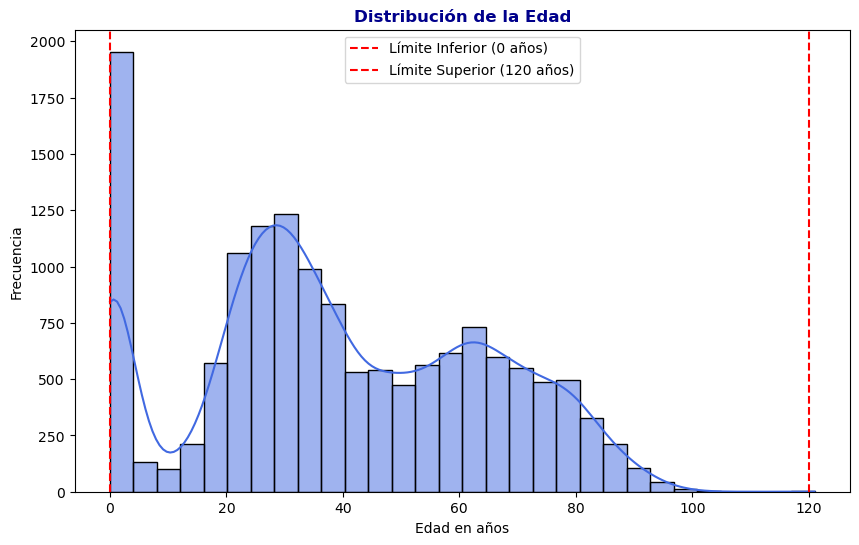

In [72]:
# Distribución de una columna numérica ('Edad en años')
plt.figure(figsize=(10, 6))

# Histograma con KDE
sns.histplot(data2['Edad en años'], kde=True, bins=30, color='royalblue', edgecolor='black')

# Agregar líneas para los límites de edad
plt.axvline(x=0, color='red', linestyle='--', label='Límite Inferior (0 años)')
plt.axvline(x=120, color='red', linestyle='--', label='Límite Superior (120 años)')

# Títulos y etiquetas
plt.title('Distribución de la Edad', fontweight='bold', color='darkblue')
plt.xlabel('Edad en años')
plt.ylabel('Frecuencia')

# Leyenda
plt.legend()
plt.show()

In [73]:
# Contar la cantidad de hombres y mujeres en la columna 'Sexo (Desc)'
sexo_counts = data2['Sexo (Desc)'].value_counts()

# Mostrar el resultado
print(sexo_counts)

Sexo (Desc)
0    9617
1    4944
Name: count, dtype: int64


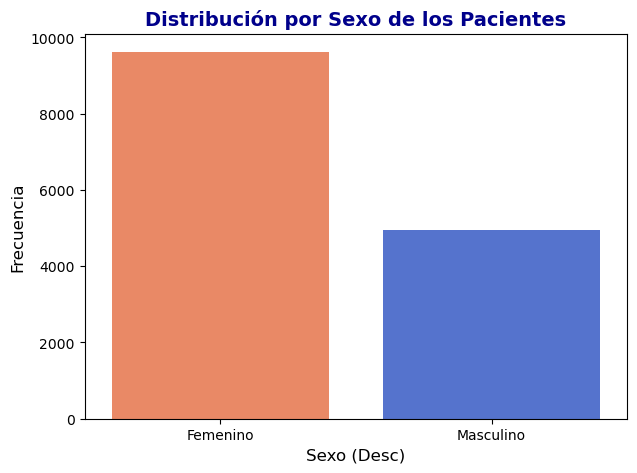

In [74]:
# Distribución de la variable 'Sexo (Desc)'
plt.figure(figsize=(7, 5))
sns.countplot(x='Sexo (Desc)', data=data2, hue='Sexo (Desc)', dodge=False, palette=['#FF7F50','royalblue'])

# Se renombra las etiquetas del eje x
plt.xticks([0, 1], ['Femenino', 'Masculino'])

# Se agrega  título y etiquetas
plt.title('Distribución por Sexo de los Pacientes', fontsize=14, fontweight='bold',color='darkblue')
plt.xlabel('Sexo (Desc)', fontsize=12)
plt.ylabel('Frecuencia', fontsize=12)

plt.legend([],[], frameon=False)
plt.show()

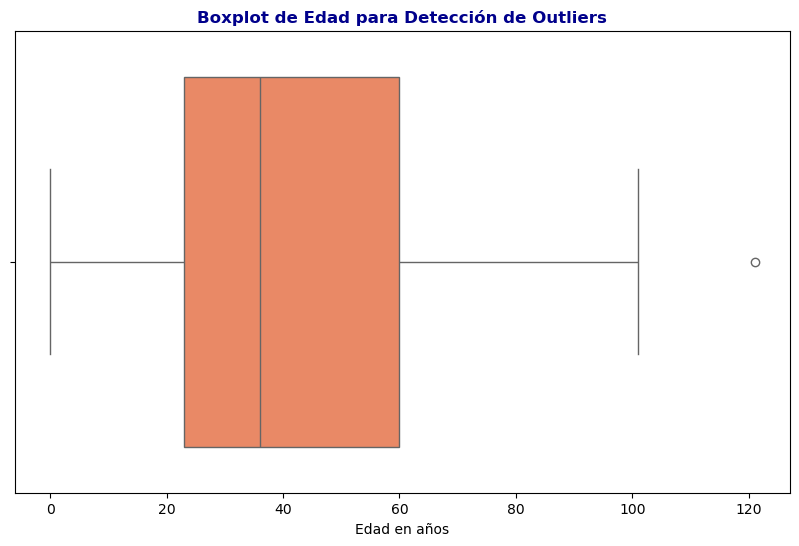

In [75]:
# Cargo el dataset
file_path = r'dataset_elpino.csv'  # Reemplazo con la ruta de tu archivo CSV
data = pd.read_csv(file_path, delimiter=';')

# Boxplot de la variable 'Edad en años' para la detección de outliers
plt.figure(figsize=(10, 6))
sns.boxplot(x=data['Edad en años'], color= '#FF7F50')

# Agregar título y etiquetas
plt.title('Boxplot de Edad para Detección de Outliers', fontweight='bold', color='darkblue')
plt.xlabel('Edad en años')

# Mostrar el gráfico
plt.show()

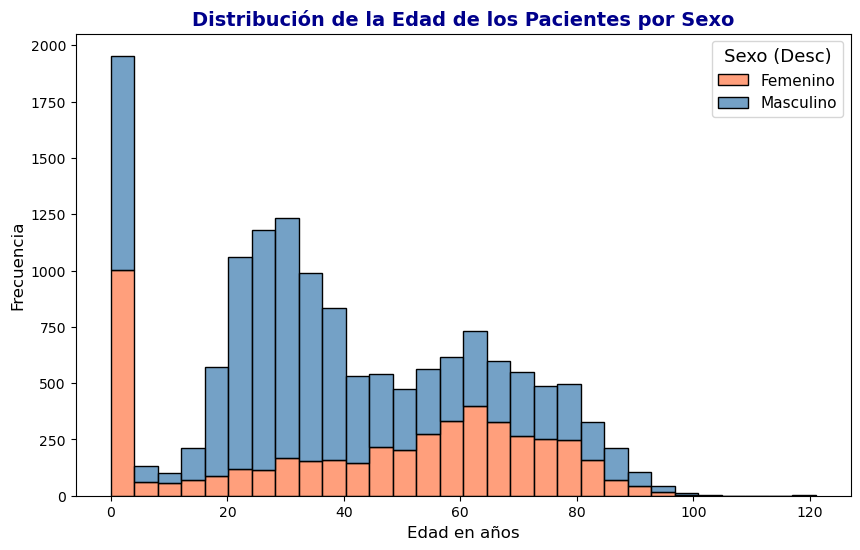

In [77]:

# Convertir la columna 'Sexo (Desc)' a numérica para facilitar la distinción
#data2['Sexo (Desc)'] = data2['Sexo (Desc)'].map({'Hombre': 1, 'Mujer': 0})

# Crear un gráfico de distribución de la edad por sexo
plt.figure(figsize=(10, 6))
sns.histplot(data=data2, x='Edad en años', hue='Sexo (Desc)', multiple='stack', bins=30, palette=['#4682B4', '#FF7F50'])

# Configurar etiquetas y título
plt.title('Distribución de la Edad de los Pacientes por Sexo', fontweight='bold', fontsize=14,color='darkblue')
plt.xlabel('Edad en años', fontsize=12)
plt.ylabel('Frecuencia', fontsize=12)

plt.legend(labels=['Femenino', 'Masculino'], title='Sexo (Desc)', title_fontsize='13', fontsize='11')

plt.show()

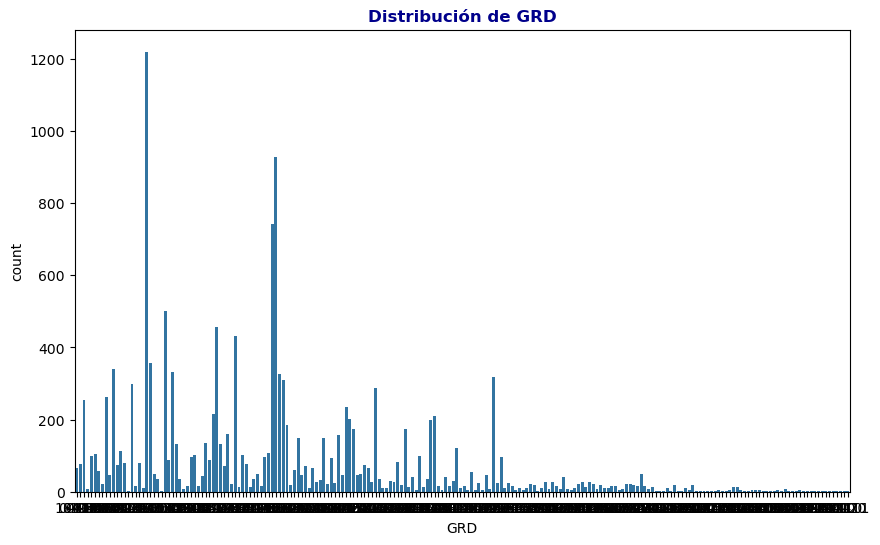

In [93]:
# Distribución de la variable objetivo GRD_cod
plt.figure(figsize=(10, 6))
sns.countplot(x='GRD', data=data2)
plt.title('Distribución de GRD',fontweight='bold', color='darkblue')
plt.show()

In [94]:
# Se convierte la columna 'Sexo (Desc)' a numérica (Hombre=1, Mujer=0)
data2['Sexo (Desc)'] = data['Sexo (Desc)'].map({'Hombre': 1, 'Mujer': 0})
print(data2['Sexo (Desc)'])

0        1
1        1
2        1
3        1
4        1
        ..
14556    0
14557    1
14558    1
14559    1
14560    1
Name: Sexo (Desc), Length: 14561, dtype: int64


In [95]:
print(data2.head())

  Diag 01 Principal (cod+des) Diag 02 Secundario (cod+des)  \
0                      A41.8                        B37.6    
1                      U07.1                        J12.8    
2                      K56.5                        R57.2    
3                      K76.8                        K66.1    
4                      T81.0                        Y83.2    

  Diag 03 Secundario (cod+des) Diag 04 Secundario (cod+des)  \
0                       I39.8                          N10    
1                       R06.0                          R05    
2                       R57.1                          J80    
3                       N18.5                        D64.9    
4                       S31.1                       S36.80    

  Diag 05 Secundario (cod+des) Diag 06 Secundario (cod+des)  \
0                       B96.1                        L89.9    
1                       R50.9                        Z29.0    
2                         Y95                        J15.0 